# 02：Effective Elastic Media: Bounds

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Voigt and Reuss Bounds</li>
    <li>Voigt–Reuss–Hill Average Moduli Estimate</li>
    <li>Hashin-Shtrikmann bounds</li>
    <li>In comparision to Nur's cirtical porosity model</li>
</ul>
</div>

## Voigt and Reuss Bounds

At any given volume fraction of constituents, the effective modulus will fall between the bounds. In the lecture we learn that the **Voigt upper bound** $M_v$ of `N` phases are defined as:

$
M_V=\sum_{i=1}^{N}f_iM_i 
$

The **Reuss lower bound** $M_R$ is 

$
\frac{1}{M_R} =\sum_{i=1}^{N}\frac{f_i}{M_i}
$

where `fi` is the volume fraction of the ith phase and `Mi` is the elastic bulk or shear modulus of the ith phase.


## Voigt–Reuss–Hill Average Moduli Estimate
 This average is simply the arithmetic average of the Voigt upper
bound and the Reuss lower bound.

$
M_{VRH}=\frac{M_V+M_R}{2}
$

:bell: For fluid-solid composite, calculation of Reuss, Voigt and VRH bounds are straightforward. Here we give a generalized function to compute effective moduli of `N-phases` composite: 

In [3]:
def VRH(volumes,M):
    """Computes Voigt-Reuss-Hill Average Moduli Estimate. Written by Jiaxin Yu (July 2021)

    Args:
        volumes (array): volumetric fractions of N phases
        M (array): elastic modulus of the N phase.
    Returns:
        M_v: Voigt average
        M_r: Reuss average
        M_0: Hill average 
    """    
    M_v=np.dot(volumes,M)
    
    M_r=np.dot(volumes,1/M)**-1
    
    M_h= 0.5*(M_r+M_v)
    return  M_v,M_r,M_h

## Hashin-Shtrikmann bounds

The Voigt and Reuss bounds are simply arithmetic and harmonic averages. The **Hashin-Shtrikman bounds** are stricter than the Reuss-Voigt bounds. The *two-phase* HS bounds can be written as: 

$
K^{\mathrm{HS} \pm}=K_{1}+\frac{f_{2}}{\left(K_{2}-K_{1}\right)^{-1}+f_{1}\left(K_{1}+\frac{4}{3} \mu_{1}\right)^{-1}}
$

$
\mu^{\mathrm{HS} \pm}=\mu_{1}+\frac{f_{2}}{\left(\mu_{2}-\mu_{1}\right)^{-1}+2 f_{1}\left(K_{1}+2 \mu_{1}\right) /\left[5 \mu_{1}\left(K_{1}+\frac{4}{3} \mu_{1}\right)\right]}
$

where the superscript `+/−` indicates upper or lower bound respectively. `K1` and `K2` are the bulk moduli of individual phases; `µ1` and `µ2` are the shear moduli of individual phases; and `f1` and `f2` are the volume fractions of individual phases. The upper and lower bounds are computed by interchanging which material is termed 1 and which is termed 2. The expressions yield the upper bound when the stiffest material is termed 1 and the lower bound when the softest material is termed 1. The expressions shown in the lectures represents the HS bound for *fluid-solid composite*. 

In [4]:
def HS(f, K1, K2,G1, G2, bound='upper'): 
    """Compute two-phase hashin-strikmann bound. Written by Jiaxin Yu (July 2021)

    Args:
        f (float): 0-1, volume fraction of stiff material  
        K1 (GPa): bulk modulus of stiff phase
        K2 (GPa): bulk modulus of soft phase
        G1 (GPa): shear modulus of stiff phase
        G2 (GPa): shear modulus of soft phase
        bound (str, optional): upper bound or lower bound. Defaults to 'upper'.
    """    
    if bound == 'upper':  
        K=K1+ (1-f)/( (K2-K1)**-1 + f*(K1+4*G1/3)**-1 )

        Temp= (K1+2*G1)/(5*G1 *(K1+4*G1/3))
        G=G1+(1-f)/( (G2-G1)**-1 + 2*f*Temp)
    else:  
        K=K2+ f/( (K1-K2)**-1 + (1-f)*(K2+4*G2/3)**-1 )

        Temp= (K2+2*G2)/(5*G2 *(K2+4*G2/3))
        G=G2+f/( (G1-G2)**-1 + 2*(1-f)*Temp)
    return K, G

## Examples
* Let's compute effective bulk and shear moduli of a water saturated rock using different bound models. 

Here we also make a comparision with Nur's critical porosity model as introduced in the previous notebook. Of course we can copy the function we wrote in the previous notebook here, but let's do it in a pythonic way: **Create a module!** In a nutshell, Python modules are `.py files` that consist of Python code (mainly python functions). We create a file called `model.py` in which we will put every functions we write from now on. As the lecture moving forward, we will learn more and more models and approaches that actually built on the basic models. So creating a module will avoid repetedly writing same functions in different notebook, also we are creating a toolbox that's created onced and for all.   

In [5]:
from model import * # import the module

In [8]:
# specify model parameters
phi=np.linspace(0,1,100,endpoint=True) # solid volume fraction = 1-phi
K0, G0= 37,44 # moduli of grain material
Kw, Gw= 2.2,0 # moduli of water 
# VRH bounds
volumes= np.vstack((1-phi,phi)).T
M= np.array([K0,Kw])
K_v,K_r,K_h=VRH(volumes,M)
# Hashin-Strikmann bound 
K_UHS,G_UHS= HS(1-phi, K0, Kw,G0,Gw, bound='upper')
# Critical porosity model
phic=0.4 # Critical porosity
phi_=np.linspace(0.001,phic,100,endpoint=True) # solid volume fraction = 1-phi
K_dry, G_dry= cripor(K0, G0, phi_, phic)# Compute dry-rock moduli
Ksat, Gsat = Gassmann(K_dry,G_dry,K0,Kw,phi_)# saturate rock with water

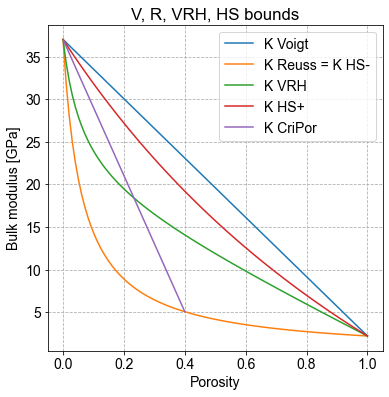

In [9]:
# plot
plt.figure(figsize=(6,6))
plt.xlabel('Porosity')
plt.ylabel('Bulk modulus [GPa]')
plt.title('V, R, VRH, HS bounds')
plt.plot(phi, K_v,label='K Voigt')
plt.plot(phi, K_r,label='K Reuss = K HS-')
plt.plot(phi, K_h,label='K VRH')
plt.plot(phi, K_UHS,label='K HS+')
plt.plot(phi_, Ksat,label='K CriPor')
plt.legend(loc='best')
plt.grid(ls='--')

<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>